In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

The parameters for the simulation are declared:

In [262]:
N2 = 1e-5 # s^-2, interior stratification
theta = 0.1812*np.pi/180 # 0.01 # angle of the slope 2.716
f = 1e-4 # s^-1 coriolis parameter
Vinf = 0.1
# m s^-1 interior velocity
delta = 0.5

In [263]:
1.25*256

320.0

In [264]:
np.arctan(2*f/N2**(0.5))*180/np.pi

3.6188832299832416

The Slope Burger Number is defined as 
$$ S_\infty = \dfrac{N_\infty\theta}{f}$$
so we calculate it to be

In [265]:
Sinf = (N2**(0.5)*np.tan(theta))/f # Slope Burger Number
Sinf

0.10000852195890676

The gamma parameter is defined to be 
$$ \gamma = (1+S_\infty^2)^{-1}$$
so we calculate it to be

In [266]:
(np.cos(theta)*(1+(1-0.5)*Sinf**2))**(-1)

0.9950290078049405

In [267]:
gamma= (np.cos(theta)*(1+(1-delta)*Sinf**2))**(-1)
gammau

NameError: name 'gammau' is not defined

In [268]:
gammal = (3-Sinf**2)*(np.cos(theta)*(3+3*Sinf**2-4*delta*Sinf**2))**(-1)
gammal

0.9933593205622109

In [269]:
gammam = (gammau+gammal)/2
gammam

NameError: name 'gammau' is not defined

In [270]:
N2*(1-gammau)

NameError: name 'gammau' is not defined

In [271]:
# -0.6670254617771576

In [272]:
-(Sinf**2*gammal)

-0.009935286351225517

In [273]:
-(Sinf**2*gammam)

NameError: name 'gammam' is not defined

In [274]:
-(Sinf**2*gammau)

NameError: name 'gammau' is not defined

In [275]:
lmbd = N2*np.tan(theta)*gammal/f
lmbd

0.0003141545686353199

The boundary layer height is defined to be 
$$ h = \dfrac{fV_\infty}{\gamma N^2_\infty\theta} $$
so we see it is

In [276]:
h = (f*Vinf)/(gamma*N2*np.tan(theta)) # m height
h

317.7805039176529

In [277]:
hl = (f*Vinf)/(gammal*N2*np.tan(theta)) # m height
hl

318.31464503094026

In [278]:
hm = (f*Vinf)/(gammam*N2*np.tan(theta)) # m height
hm

NameError: name 'gammam' is not defined

In [279]:
np.cos(theta)

0.9999949991852802

Note that we round this to the next highest whole number to prevent issues at the boundary height in the simulation. 

We define the modified coriolis parameter to be 
$$ f^*=(f^2+N^2_\infty\theta)^{0.5} $$
which we calculate to be 

In [280]:
fstar = f*np.cos(theta)*(1+Sinf**2)**(0.5) # s^-1 modified coriolis frequency
fstar/2

5.0249169217681655e-05

Richardson number:
$$ Ri\equiv \dfrac{f^2(1-\gamma)}{N^2_\infty\theta^2\gamma^2}$$
and for $\gamma=(1+S^2_\infty)^{-1}$
$$ Ri\equiv \dfrac{f^2(1-\gamma)}{N^2_\infty\theta^2\gamma^2}=1+S^2_\infty$$
so we calculate

In [281]:
Ri = (1-gamma)/(Sinf**2*gamma*2)
Ri

0.2497487516716158

In [282]:
(N2*(1-gamma))/(N2*theta*gamma/f-0.1*N2*theta*gamma/f)**2

0.6197484609236825

Rossby Number:
$$ Ro\equiv \dfrac{\gamma N_\infty^2\theta^2}{f^2}=\dfrac{S^2_\infty}{1+S^2_\infty}$$
so we calculate

In [283]:
Ro = -(Sinf**2)*gamma
Ro

-0.009951986069575286

In [284]:
np.cos(theta)

0.9999949991852802

In [285]:
f*N2*np.cos(theta)*(np.cos(theta)-gamma)+f*np.sin(theta)**2*N2-(1-delta)*lmbd*N2*np.sin(theta)

8.349817418582684e-15

In [286]:
f*N2*(1-gamma*np.cos(theta))+np.sin(theta)*((1-delta)*lmbd)*N2*(1-gamma*np.cos(theta))-((1-delta)*lmbd)*N2*np.sin(theta)

3.306852803055988e-14

In [287]:
f*N2*(1-gamma*np.cos(theta)*(1+(1-delta)*Sinf**2))

0.0

In [288]:
# 3.41614763e-16

In [289]:
fstar/2

5.0249169217681655e-05

In [290]:
Ri

0.2497487516716158

The initial conditions and the shear parameter are declared below:

In [291]:
delta = 0.5 # perturbed shear parameter
vo = delta*(gamma*N2*np.tan(theta))/(f) # s^-1 initial pertubation shear v
lmbd = (np.tan(theta)*N2*gamma)/(f)

In [292]:
PV_test = f*N2*(1-gamma*np.cos(theta)*(1+(1-delta)*Sinf**2))
((f*PV_test)/(N2*(1-gamma*np.cos(theta))))**(0.5)

0.0

In [293]:
PV_test

0.0

In [294]:
fstar/2

5.0249169217681655e-05

In [295]:
gamma*np.cos(theta)

0.9950240318492317

In [296]:
(delta*Vinf)**2

0.0025000000000000005

In [297]:
(0.5*0.05)**2

0.0006250000000000001

Now, we define the oscillations and calculate them:

In [298]:
def shear_osc(t):
        u = (f*vo)/(fstar)*np.sin(fstar*t)
        v = vo+(f**2*vo)/(fstar**2)*(np.cos(fstar*t)-1)
        N = N2*theta*(f*vo)/(fstar**2)*(np.cos(fstar*t)-1)
        return [u,v,N]

In [299]:
t = np.linspace(0,(2*np.pi)/fstar,100)
perts = shear_osc(t)

In [300]:
len(t)

100

We know that the ertel potential vorticity is defined to be 
$$ q\equiv fN^2_\infty(1-\gamma)-\dfrac{N^4_\infty \theta^2\gamma}{f}+N^2_\infty\theta v_o-fb_o$$
so we calculate

In [301]:
PV = (f-theta*(lmbd-vo))*(N2*(1-gamma)+N2*theta**2*gamma)-(lmbd-vo)*(f*lmbd-theta*N2*(1-gamma)) # s^-2 potential vorticity
PV

2.963718200455841e-14

In [302]:
PV = (f-theta*(lmbd-vo))*(N2*(1-gamma))-(lmbd-vo)*(theta*N2*gamma) # s^-2 potential vorticity
PV

-4.984250357137526e-15

In [303]:
f*N2*(1-gamma*(1+(1-delta)*Sinf**2))

-5.000839728097617e-15

The mininum frequency in a baroclinic flow is given by for our case
$$ \omega_{\text{min}}\equiv \sqrt{\dfrac{fq}{N^2_\infty(1-\gamma)}}$$
which we calculate to be

In [304]:
omega_min = (f*PV/(N2*(gamma)))**(0.5)
omega_min

/var/folders/n0/rsxpkn6j2xv8hrpk19m6_r6m0000gn/T/ipykernel_17290/3593138245.py:1: RuntimeWarning: invalid value encountered in scalar power
  omega_min = (f*PV/(N2*(gamma)))**(0.5)


nan

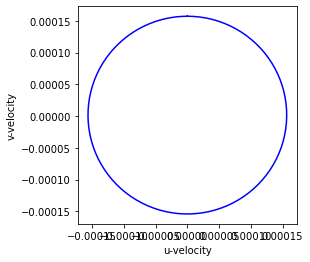

In [305]:
plt.plot(perts[0],perts[1],color="blue")
plt.xlabel("u-velocity")
plt.ylabel("v-velocity")
plt.gca().set_aspect(1)

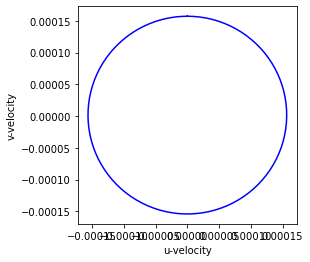

In [306]:
plt.plot(perts[0],perts[1],color="blue")
plt.xlabel("u-velocity")
# plt.xticks(ticks=[-0.0008,-0.0004,0,0.0004,0.0008])
plt.ylabel("v-velocity")
plt.gca().set_aspect(1)

In [322]:
def background_in_flow(perts):
    u = perts[0]
    v = perts[1]
    b = perts[2]
    u_T = u*(h-10)
    v_T = v*(h-10)  # 0.1-lmbd*(h-10)+
    B = b*(h-10)  # N2*(np.sin(theta)*1000+10*np.cos(theta))+N2*gamma*(h-10)+
    return [u_T,v_T,B]

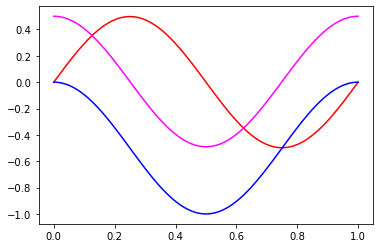

In [338]:
plt.plot(t*fstar/(2*np.pi),perts[0]*lmbd**(-1),color="red")
plt.plot(t*fstar/(2*np.pi),perts[1]*lmbd**(-1),color="magenta")
plt.plot(t*fstar/(2*np.pi),perts[2]*lmbd**(-2)*gamma**(-1),color="blue")

In [339]:
np.argmax(perts[1])

0

Text(0, 0.5, 'Energy [$m^2\\,s^{-2}$]')

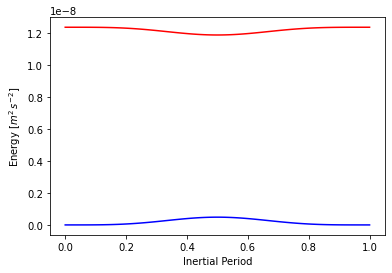

In [324]:
plt.plot(t*fstar/(2*np.pi),(perts[0]**2+perts[1]**2)/2,color="red",label="KE")
plt.plot(t*fstar/(2*np.pi),(perts[2]**2*1e5)/2,color="blue",label="PE")
plt.xlabel("Inertial Period")
plt.ylabel("Energy [$m^2\,s^{-2}$]")

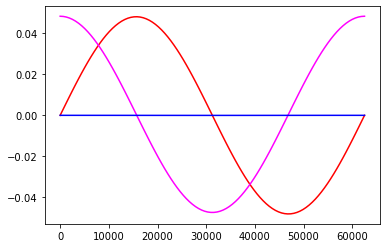

In [328]:
u,v,B=background_in_flow(perts)
plt.plot(t,u,color="red")
plt.plot(t,v,color="magenta")
plt.plot(t,B1e-5,color="blue")
# plt.yscale("symlog",linthresh=1e-3)

In [317]:
B[0]

0.0027961185044740075

In [ ]:
Ri = (N2*(1-gamma)-perts[-1])/(perts[0]**2+(lmbd-perts[1])**2)
plt.plot(Ri)

In [ ]:
f*N2*(1-gamma)-(lmbd*0.001-delta*lmbd)*N2*theta

In [ ]:
t = np.arange(0,(2*np.pi)/fstar,0.1)
plt.plot(f*perts[1]+theta*perts[2])
plt.plot((f*vo)*np.cos(fstar*t))

In [ ]:
t = np.arange(0,(2*np.pi)/fstar,0.1)
plt.plot(f*theta*perts[1])
plt.plot(perts[2])

In [ ]:
Ro_t = -theta*(lmbd-perts[1])/f
plt.plot(Ro_t)

In [ ]:
PV_t = (f-theta*(lmbd-perts[1]))*(N2*(1-gamma))-(lmbd-perts[1])*(N2*theta)
plt.plot(PV_t)

In [ ]:
PV_t[0]

In [ ]:
perts[-1][0]

Note that under our definition of $\gamma$ this reduces to 
$$\omega_{\text{min}}=f\sqrt{\delta}$$
which we can verify as

In [ ]:
omega_min_delta = (theta*vo*f/(gamma))**(0.5)
omega_min_delta

In [ ]:
omega_min_delta = f*Sinf*(delta)**(0.5)
omega_min_delta

In [ ]:
j = np.where(t==round(0.25*(2*np.pi)/fstar,1))[0]
t[j[0]]

In [ ]:
N2

In [ ]:
def x2x1(i,perts):
    return (1-gamma)*h/theta + perts[2][i]*h/(N2*theta)

In [ ]:
def angle(i,perts):
    return np.arctan(h/x2x1(i,perts))

In [ ]:
np.pi - angle(j,perts)

In [ ]:
k = np.where(t==round(0.5*(2*np.pi)/fstar,1))
t[k[0]]

In [ ]:
amax = (angle(k,perts)-angle(j,perts))[0]
amax

In [ ]:
intlphi = np.pi -angle(j,perts)

In [ ]:
plt.plot(t*(fstar)/(2*np.pi),perts[1])

In [ ]:
plt.plot(t*(fstar)/(2*np.pi),perts[2])

In [ ]:
np.sin(intlphi)+N2*theta*f*vo/fstar*(np.cos(fstar*np.pi/(2*fstar))-1)*h

In [ ]:
np.sin(intlphi)

In [ ]:
plt.plot(t*(fstar)/(2*np.pi),N2*theta*f*vo/fstar*np.cos(fstar*t)+np.cos(intlphi))

In [ ]:
q = (np.sin(intlphi))**(-1)*(2*fstar**2*1e-8)/(1e-8*(f*vo*np.sqrt(2)+fstar*vo+fstar*N2**(0.5)*gamma*Sinf))
q

In [ ]:
2*fstar/np.pi*np.log(q)

In [ ]:
uma = max(perts[0])
vma = max(perts[1])
bma = max(perts[2])
print(f"u max{uma}")
print(f"v max{vma}")
print(f"b max{bma}")

In [ ]:
umi = min(perts[0])
vmi = min(perts[1])
bmi = min(perts[2])
print(f"u min{umi}")
print(f"v min{vmi}")
print(f"b min{bmi}")

In [ ]:
plt.plot(perts[0],perts[1])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,0,vma,colors="k")
plt.gca().set_aspect('equal')

In [ ]:
plt.plot(perts[0],perts[2])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,bmi,bma,colors="k")

In [ ]:
plt.plot(perts[2])
# plt.gca().set_aspect('equal')

In [ ]:
z = np.arange(0,h+1,1)
# plt.plot(vprofile,z,color="r")
vprofile = Vinf-gamma*theta*N2/f*(h-z)
plt.plot(vprofile,z,color="b")
plt.plot(vprofile+perts[1][-1]*(h-z),z,c="y")
# plt.ylim([0,1])

In [ ]:
# plt.plot(vprofile,z,color="r")
uprofile = h*uo*np.ones(np.size(z))
# plt.plot(uprofile,z,color="b")
plt.plot(perts[0][0]*(h-z),z,c="y")
plt.vlines(0,0,h)
# plt.ylim([0,1])

In [ ]:
gamma1
Sinf21

In [ ]:
bint = N2*(h+z)+N2*theta*100
bprofile = N2*z+gamma*N2*(h-z)+N2*theta*100
plt.plot(bint,z+h,"y")
plt.plot(bprofile,z,c="b")
plt.plot(bprofile+perts[2][15515]*(h-z),z,c="r")
# plt.ylim([99,111])

In [ ]:
PV = f*N2*(1-gamma)-(N2**2*theta**2*gamma)/f+N2*theta*vo-f*bo
# omega_min = np.sqrt(PV/N2)
PV

In [ ]:
fstar

In [ ]:
np.Im